In this example we show how to define an equation of two interacting ODEs, and use DifferentialEquations.jl to solve them using both the built-in ODE solvers, and the wrappers for ODE.jl and ODEInterface.jl. We will use the Van der Pol Equations as our example. In the two-dimensional form, the equation is given by:

\begin{align}
\dot{x} & = (1- y^2)x - y \\
\dot{y} & = x
\end{align}

We define the ODEProblem as follows. We write it in the form:

\begin{align}
\dot{x_1} & = f_1(x_1,\ldots,x_n) \\
\vdots    & = \vdots   \\
\dot{x_n} & = f_n(x_1,\ldots,x_n) 
\end{align}

and then define the ODEProblem appropriately.

In [2]:
using DifferentialEquations

f = @ode_define begin
  dy = μ*(1-x^2)*y - x
  dx = y
end μ=>1.
prob = ODEProblem(f,[0;sqrt(3)]);

Note that in DifferentialEquations.jl, these do not have to be vector functions. You can represent the values as ODEs in a matrix or tensor, or however else you wish!

As before, we solve and plot the solution:


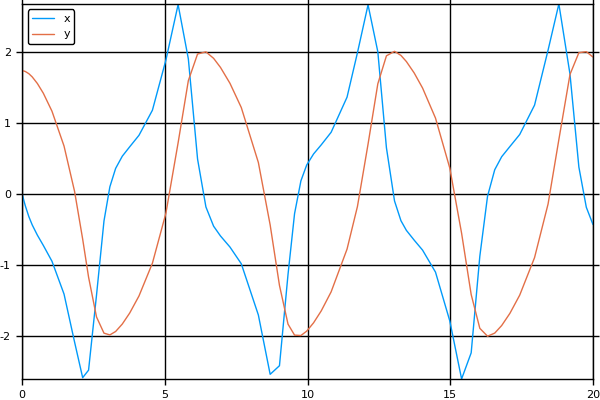

In [5]:
Δt = 1//2^(4) #The initial timestepping size. It will automatically assigned if not given.
tspan = [0,20] # The timespan. This is the default if not given.

sol =solve(prob::ODEProblem,tspan,Δt=Δt,alg=:ExplicitRK)
plot(sol,lab=["x" "y"])

And this weird-lookin' thing is why it's also known as the Van der Pol oscillator.

## Using External Solvers

Knowing what the solution looks like, let's try using solve ODE solvers from other packages. Since DifferentialEquations.jl wraps other solvers, it's as easy as flipping one keyword argument! For example, let's call the `ode45` method from ODE.jl:


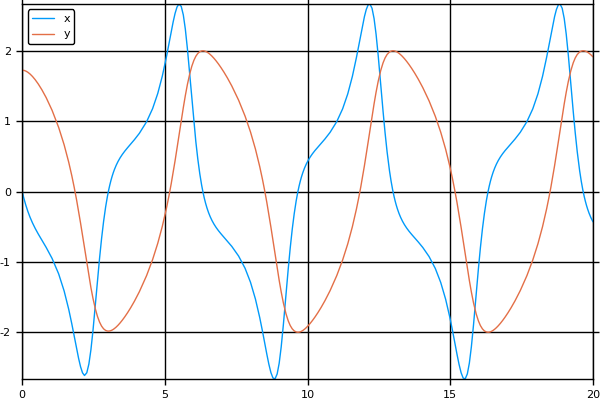

In [11]:
sol =solve(prob::ODEProblem,tspan,Δt=Δt,alg=:ode45)
plot(sol,lab=["x" "y"])

Notice that the first time you call an external package you will get the message `[DifferentialEquations.jl] Initializing backend: PkgName`. If the package is not installed, the system will notify you that it's likely the cause of an error and abort. The external package is only loaded the first time, and so compilation costs will hit this first run. Notice that we got the same solution out from ODE.jl. Good, otherwise I'd be worried.

We can do the same with ODEInterface.jl. This library wraps famous Fortran ODE solvers. The most famous would be its `dopri5` which is a Dormand-Prince 4/5 solver which is known to be very fast and robust. We can call this algorithm simply by changing the `alg` keyword to `:dopri5`:

[DifferentialEquations.jl] Initializing backend: ODEInterface



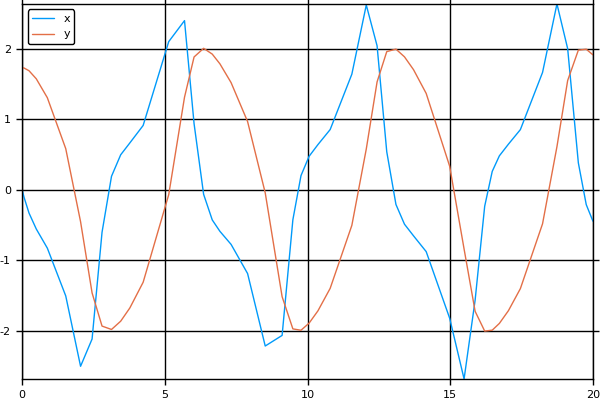

In [12]:
sol =solve(prob::ODEProblem,tspan,Δt=Δt,alg=:dopri5)
plot(sol,lab=["x" "y"])

Note that all of the options for the external solvers are available as keyword arguments. Commands from DifferentialEquations.jl solvers will automatically alias to the appropriate commands for the external solvers. For example Δt sets the value INITIALSS in ODEInterface when using `dopri5`. We can set ODEInterface options by simply adding them. Forexample, to set SSBETA to 0.01, we use:


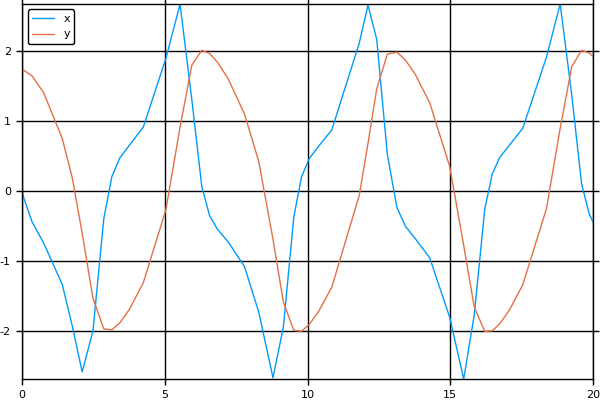

In [15]:
sol =solve(prob::ODEProblem,tspan,Δt=Δt,alg=:dopri5,SSBETA=0.01)
plot(sol,lab=["x" "y"])

Last but not least, Sundials is available. Its non-stiff Adams-Moulton solver is available via `alg=:cvode_Adams` and its stiff BDF solver is available via `alg=:cvode_BDF`. For example:

[DifferentialEquations.jl] Initializing backend: Sundials



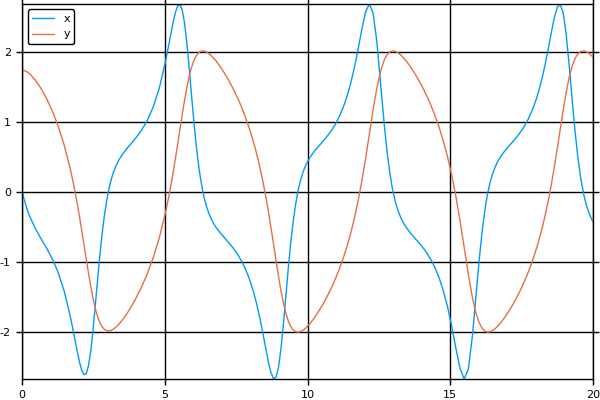

In [7]:
sol =solve(prob::ODEProblem,tspan,Δt=Δt,alg=:cvode_Adams)
plot(sol,lab=["x" "y"])

## Other Conditional Dependencies

Some of the methods use external packages as well. For example, the Trapezoid method needs to solve an implicit equation. To do this efficiently, it uses the ForwardDiff.jl and NLsolve.jl packages. When this algorithm is first run, it will initilize the backends as well, and notify the user if packages need to be installed. For example:


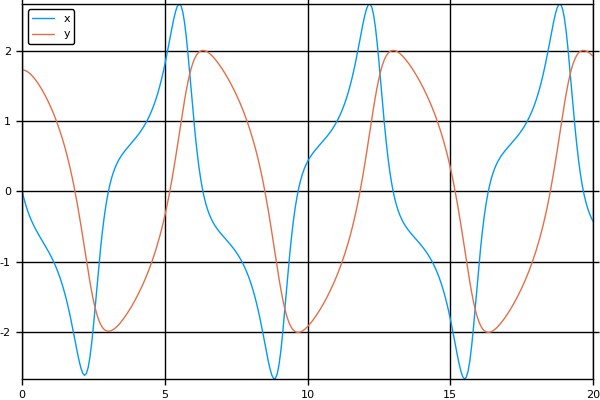

In [8]:
sol =solve(prob::ODEProblem,tspan,Δt=Δt,alg=:Trapezoid)
plot(sol,lab=["x" "y"])